
Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]


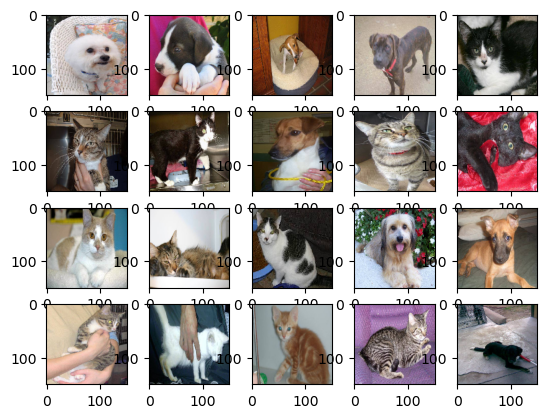

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

#이미지 디렉토리 위치 저장
train_dir='../cat_dog_small/train'
validation_dir='../cat_dog_small/validation'

#데이터 생성 
train_datagen = ImageDataGenerator(rescale=1/255) #0~1까지 정규화 
validation_datagen = ImageDataGenerator(rescale=1/255) 

#설정 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats','dogs'], #클래스 지정: 타겟, 레이블
    target_size=(150,150),  
    batch_size = 20, #한번에 몇개 사이즈를 갖고 올 것인가 
    class_mode = 'binary', #0 아니면 1 개아니면 고양이를 구별하는 거라 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats','dogs'], #클래스 지정: 타겟, 레이블
    target_size=(150,150),  
    batch_size = 20, #한번에 몇개 사이즈를 갖고 올 것인가 
    class_mode = 'binary', #0 아니면 1 개아니면 고양이를 구별하는 거라 
)

#한번에 20개 이미지 가져와서 

fig = plt.figure()
axs = []
for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for data_batch,label_batch in train_generator: 
    print(data_batch.shape)   
    print(label_batch.shape)
    print(label_batch) 

    for idx, img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
    
    break


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.optimizers import Adam

#1. model 생성 
model = Sequential()

#2. 모델에 레이어 추가 

####1

model.add(Conv2D(
    filters = 32, # 필터를 32번 적용한다 
    kernel_size=(3,3),#내부적으로 랜덤하게 만들어서 
    strides = (1,1),
    padding ='valid', #valid= no padding  또는 "same"=0으로 채움 옵션이 있음 
    activation = 'relu',
    input_shape=(150,150,3)
))

model.add(MaxPooling2D(
    pool_size =(2,2) #If None, it will default to pool_size.    
))

####2
model.add(Conv2D(
    filters = 64, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####3
model.add(Conv2D(
    filters = 128, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####4
model.add(Conv2D(
    filters = 256, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####5
model.add(Conv2D(
    filters = 512, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

model.add(Flatten())
model.add(Dense(
    units=1,
    activation='sigmoid'
    
))

model.summary()
model.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics =['acc']
)

model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50, #1000개 이미지니까, 20개씩 하면 
    verbose =1, #하면서 이게 없으면 30분 한시간동안 화면이 멈춰져 있음. 중간중간 메세지를 알려줌. 
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      